## Problem Definition

The goal of this project is to build a supervised machine learning model that can classify iris flowers into three species — Setosa, Versicolor, and Virginica based on four numerical features: 

- Sepal length
- Sepal width
- Petal length
- Petal width

This is a **multi-class classification** problem where the target variable is the flower species. The Iris dataset is a well-known benchmark dataset that is suitable for understanding and validating basic machine learning workflows.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

## Dataset Description

The Iris dataset consists of 150 samples with:
- 4 numerical features
- 3 equally distributed target classes

There are no missing values in the dataset, making it suitable for introductory machine learning experiments.

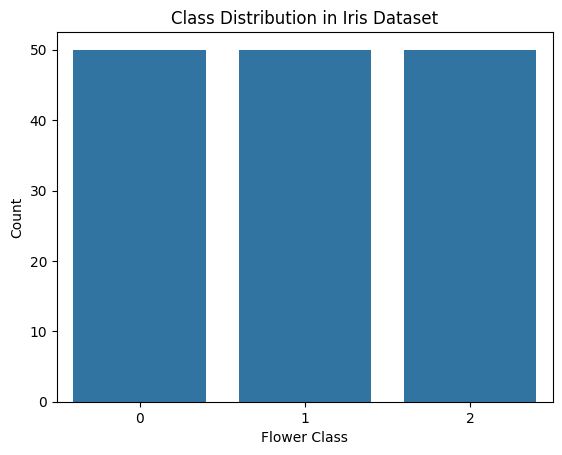

In [10]:
sns.countplot(x="species", data=df)
plt.title("Class Distribution in Iris Dataset")
plt.xlabel("Flower Class")
plt.ylabel("Count")
plt.show()

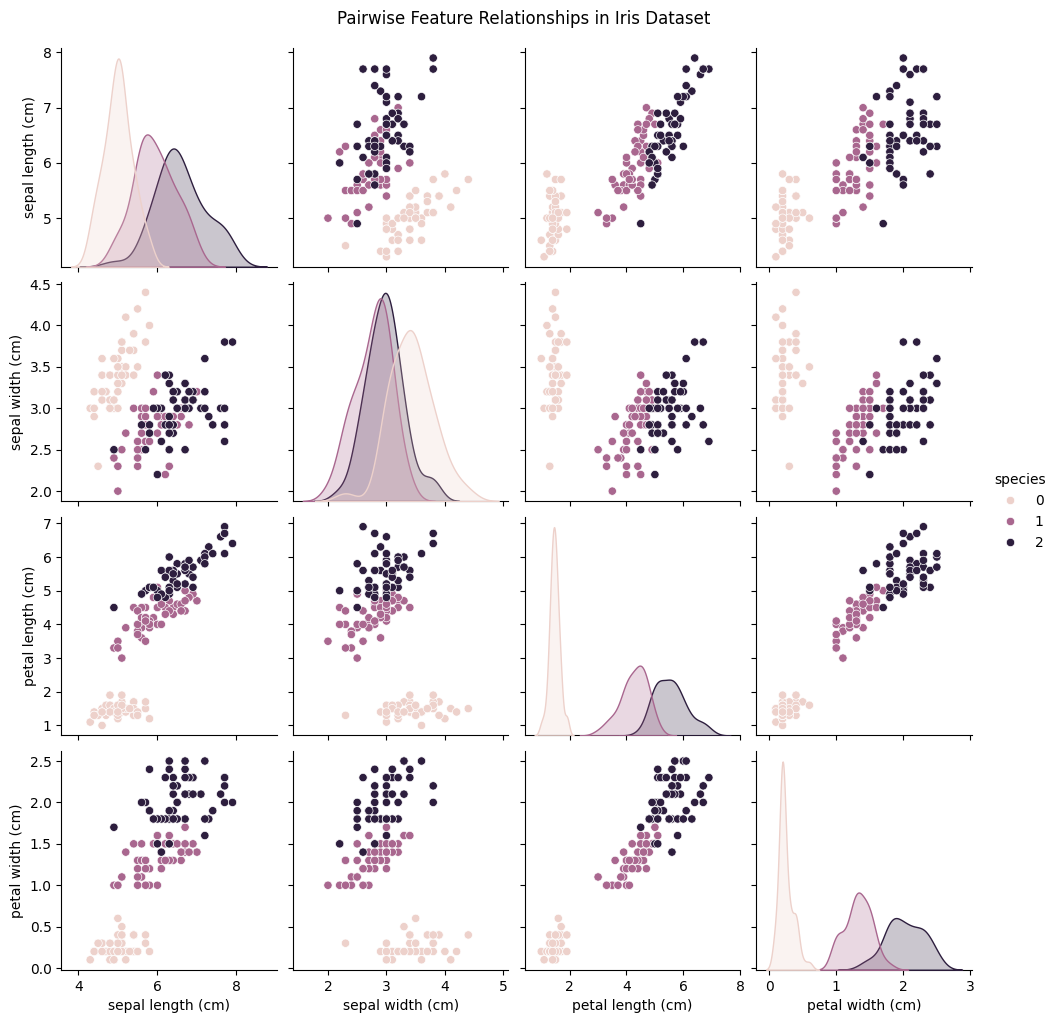

In [9]:
sns.pairplot(df, hue="species")
plt.suptitle("Pairwise Feature Relationships in Iris Dataset", y=1.02)
plt.show()

In [11]:
df.info()
df.describe()
df['species'].value_counts()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


species
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
X = df.drop('species', axis=1)
y = df['species']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

## Model Selection

Logistic Regression was chosen for this task because:

- It is well-suited for **classification problems**
- It supports **multi-class classification**
- It is easy to interpret compared to more complex models
- It performs well on linearly separable data such as the Iris dataset

Additionally, Logistic Regression allows us to analyze feature coefficients, which helps in understanding how each feature contributes to the prediction.


In [14]:
model=LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



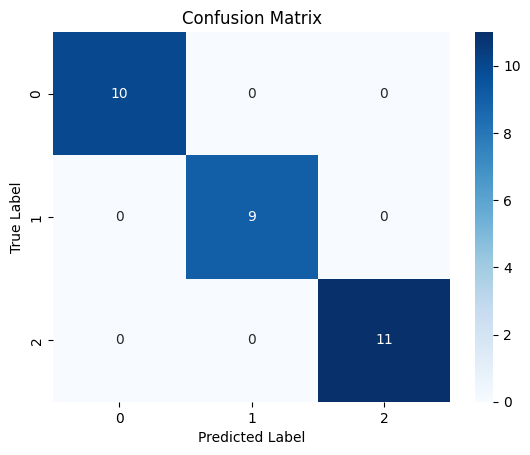

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

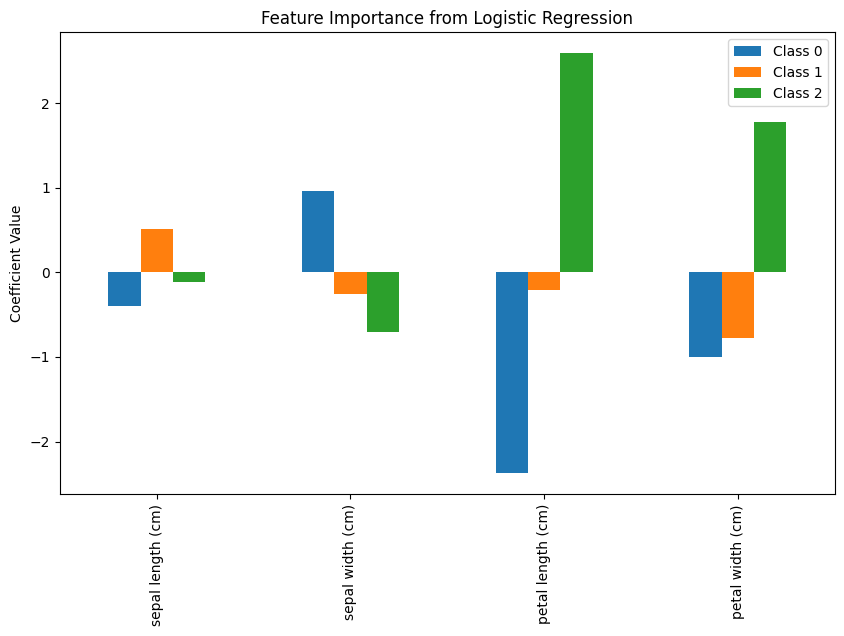

In [ ]:
coefficients = pd.DataFrame(
    model.coef_.T,
    index=X.columns,
    columns=[f"Class {i}" for i in range(3)]
)

coefficients.plot(kind="bar", figsize=(10, 6))
plt.title("Feature Importance from Logistic Regression")
plt.ylabel("Coefficient Value")
plt.show()

## Model Evaluation

The model achieves high accuracy on the test set, indicating that it is able to
classify iris species effectively.

From the confusion matrix and classification report:
- The model performs especially well on the Setosa class, which is known to be easily separable.
- There is minor confusion between Versicolor and Virginica, which is expected due to overlapping feature distributions.
- Precision, recall, and F1-scores are consistently high across all classes, suggesting balanced performance.

Overall, the results indicate that Logistic Regression is a suitable model for this dataset.